# Advanced Game Analysis

### **Part Three:** Visualizations for the Cognitive Microscope (2/2)

<h1> Análisis Avanzado de Partidas</h1>
<h3> <strong>Tercera parte:</strong> Gráficos para el microscopio cognitivo (2/2)</h3>

## 0. Carga de librerías necesarias

In [1]:
# =========================
# Módulos estándar de Python
# =========================
from pathlib import Path
from ast import literal_eval

# =========================
# Datos y cálculo numérico
# =========================
import numpy as np
import pandas as pd
from numpy.polynomial import Polynomial

# =========================
# Visualización
# =========================
import matplotlib.pyplot as plt

## 1. Carga del dataframe (filtramos solo los jugadores_objetivo)

In [2]:

# --- Configuración de carpeta y jugadores objetivo ---
carpeta_parquets = Path("./analizadas_grupo")

jugadores_objetivo = [
    "Carlsen,M", "Nakamura,Hi", "Nepomniachtchi,I", "Caruana,F", "Lai,Duc Minh", 
    "Niemann,Hans Moke", "Firouzja,Alireza", "Vlassov,N", "Sarana,A",
    "Rustemov,A", "Andreikin,D", "Bluebaum,M", "Zhigalko,S", "Bortnyk,Olexandr"
]

# --- Leer y filtrar solo partidas de los jugadores objetivo ---
df_previo = pd.concat(
    [
        pd.read_parquet(p).query("jugador in @jugadores_objetivo")
        for p in carpeta_parquets.glob("*.parquet")
    ],
    ignore_index=True
)

print(f"Partidas cargadas (jugadores objetivo): {len(df_previo)}")

# --- Normalización de nombres ---
# Diccionario de reemplazo
mapa_nombres = {
    "Lai,Duc Minh": "Lai,D",
    "Niemann,Hans Moke": "Niemann,H",
    "Firouzja,Alireza": "Firouzja,A",
    "Nakamura,Hi": "Nakamura,H",
    "Bortnyk,Olexandr": "Bortnyk,O"
}

# Verificamos que las columnas existen antes de reemplazar
for col in ["jugador", "rival"]:
    if col in df_previo.columns:
        df_previo[col] = df_previo[col].replace(mapa_nombres)

# --- Guardar resultado final ---
df_raw = df_previo.copy()

print("Nombres normalizados y DataFrame final creado como 'df_raw'")
print(f"Columnas disponibles: {list(df_raw.columns)}")

print(df_raw.shape)



Partidas cargadas (jugadores objetivo): 9361
Nombres normalizados y DataFrame final creado como 'df_raw'
Columnas disponibles: ['jugador', 'rival', 'color', 'fide_id', 'elo', 'elo_rival', 'evento', 'lugar', 'fechas', 'cod_eco', 'resultados', 'movimientos_total', 'mov_peones', 'mov_centrales', 'intercambio_piezas', 'enroque', 'pgn', 'san', 'evals_all', 'evals_jugador', 'precision_jugador', 'errores_leves_apertura', 'errores_leves_mediojuego', 'errores_leves_final', 'errores_leves', 'errores_apertura', 'errores_mediojuego', 'errores_final', 'errores', 'errores_graves_apertura', 'errores_graves_mediojuego', 'errores_graves_final', 'errores_graves', 'precision', 'precision_apertura', 'precision_mediojuego', 'precision_final', 'eval', 'eval_apertura', 'eval_mediojuego', 'eval_final']
(9361, 41)


In [3]:
# Mostrar un resumen del DataFrame resultante
# print(f"Filas cargadas: {len(df_raw)}")
print(df_raw['jugador'].value_counts())
#print(df.head())


jugador
Rustemov,A          1032
Sarana,A             969
Vlassov,N            865
Bluebaum,M           831
Bortnyk,O            813
Nakamura,H           689
Zhigalko,S           652
Lai,D                606
Carlsen,M            580
Firouzja,A           514
Niemann,H            501
Andreikin,D          485
Caruana,F            430
Nepomniachtchi,I     394
Name: count, dtype: int64


In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [5]:
#print(f"{len(df)} partidas de jugadores cargadas en total.")
#df.head(2)

with pd.option_context('display.max_columns', None,
                       'display.expand_frame_repr', False,
                       'display.max_colwidth', None):
    display(df_raw.drop(columns=["precision_jugador","evals_all", "movimientos_total","eval", "eval_final", "eval_apertura", "eval_mediojuego", "evals_jugador","errores", "errores_apertura", "errores_mediojuego", "errores_final","errores_graves", "errores_graves_apertura", "errores_graves_mediojuego", "errores_graves_final","errores_leves", "errores_leves_apertura", "errores_leves_mediojuego", "errores_leves_final", "pgn", "mov_peones","mov_centrales","intercambio_piezas","enroque","san", "cod_eco","fechas","evento","fide_id","lugar","elo","elo_rival"]))


,jugador,rival,color,resultados,precision,precision_apertura,precision_mediojuego,precision_final
0,"Carlsen,M","Bezold,M",B,1.0,94.70,96.25,93.24,99.18
1,"Firouzja,A","Pichot,A",W,1.0,94.78,97.60,93.01,NaN
2,"Nakamura,H","Nesterov,Arseniy",B,1.0,96.80,98.37,95.51,99.67
3,"Caruana,F","Harsha,B",B,1.0,93.59,97.97,90.31,NaN
4,"Nepomniachtchi,I","Andersen,Mad",B,1.0,94.49,96.20,93.20,96.65
...,...,...,...,...,...,...,...,...
9356,"Bortnyk,O","Alaghehmand,Arshia",W,0.0,88.91,87.94,91.75,83.28
9357,"Carlsen,M","Duda,J",B,0.0,96.19,98.63,98.31,89.79
9358,"Sarana,A","Maghsoodloo,Parham",B,0.0,91.78,98.20,87.49,92.70
9359,"Rustemov,A","Padmini,R",W,1.0,93.31,98.43,89.26,94.84


In [6]:
#df_raw.to_csv("mi_dataframe.csv", index=False)

In [7]:
jugadores_objetivo = ["Carlsen,M", "Nakamura,H", "Lai,D", "Sarana,A","Zhigalko,S", "Bortnyk,O"]

#jugadores_objetivo = ["Carlsen,M", "Nakamura,H", "Nepomniachtchi,I", "Caruana,F", "Lai,D", "Niemann,H",  
#                      "Firouzja,A", "Vlassov,N", "Sarana,A", "Rustemov,A", "Andreikin,D",  "Bluebaum,M",
#                      "Zhigalko,S", "Bortnyk,O"]

## Precisión

In [8]:
# ==========================================
# CELDA 1: Configuración e identificación de columnas
# ==========================================
try:
    import seaborn as sns
    _HAS_SNS = True
except Exception:
    _HAS_SNS = False

# -----------------------------
# Configuración general
# -----------------------------
USE_LAST100 = True
COLORS = ["W", "B"]  # Blancas y Negras
PALETTE = {"W": "darkkhaki", "B": "slategray"}

jugadores_objetivo = ["Carlsen,M", "Nakamura,H", "Lai,D", "Sarana,A","Zhigalko,S", "Bortnyk,O"]


# Copiar datos base
df = df_raw.copy()

# -----------------------------
# Funciones auxiliares
# -----------------------------
def _find_col(df, candidates):
    """Devuelve el primer nombre de columna que exista en df (ignore case)."""
    low_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in low_map:
            return low_map[cand.lower()]
    return None

def _ensure_numeric(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

def _friendly_phase_names(cols_map):
    pretty = {}
    if cols_map.get("open"): pretty[cols_map["open"]] = "Apertura"
    if cols_map.get("mid"):  pretty[cols_map["mid"]]  = "Mediojuego"
    if cols_map.get("end"):  pretty[cols_map["end"]]  = "Final"
    return pretty

# -----------------------------
# Detección de columnas
# -----------------------------
col_jugador = _find_col(df, ["jugador","player"])
col_color   = _find_col(df, ["color"])
col_fecha   = _find_col(df, ["fechas","fecha","date","datetime"])

col_prec_total = _find_col(df, ["precision_total","precision","accuracy_total","accuracy"])
col_prec_open  = _find_col(df, ["precision_apertura","precision_opening","opening_precision"])
col_prec_mid   = _find_col(df, ["precision_mediojuego","precision_middlegame","middlegame_precision"])
col_prec_end   = _find_col(df, ["precision_final","precision_endgame"])

# Convertir a numérico
_ensure_numeric(df, [c for c in [col_prec_total, col_prec_open, col_prec_mid, col_prec_end] if c])

# Parsear fechas
if col_fecha:
    df[col_fecha] = pd.to_datetime(df[col_fecha], errors="coerce")

# Calcular precisión total si no existe
if not col_prec_total:
    phase_cols = [c for c in [col_prec_open, col_prec_mid, col_prec_end] if c]
    if phase_cols:
        col_prec_total = "__precision_total_calc__"
        df[col_prec_total] = df[phase_cols].mean(axis=1, skipna=True)
    else:
        raise RuntimeError(f"No se encontraron columnas de precisión. Columnas disponibles: {list(df.columns)}")

# Filtrar jugadores objetivo (si existe columna jugador)
if col_jugador:
    df = df[df[col_jugador].isin(jugadores_objetivo)].copy()

# Chequeo de color
if not col_color:
    raise RuntimeError("No se encontró la columna 'color' (valores esperados 'W'/'B').")

cols_map = {"open": col_prec_open, "mid": col_prec_mid, "end": col_prec_end}
phase_pretty = _friendly_phase_names(cols_map)

print(
    "Columnas detectadas:\n"
    f"  Jugador: {col_jugador}\n"
    f"  Color:   {col_color}\n"
    f"  Fecha:   {col_fecha}\n"
    f"  Precisión total: {col_prec_total}\n"
    f"  Fases: { {k:v for k,v in cols_map.items() if v} }"
)


Columnas detectadas:
  Jugador: jugador
  Color:   color
  Fecha:   fechas
  Precisión total: precision
  Fases: {'open': 'precision_apertura', 'mid': 'precision_mediojuego', 'end': 'precision_final'}


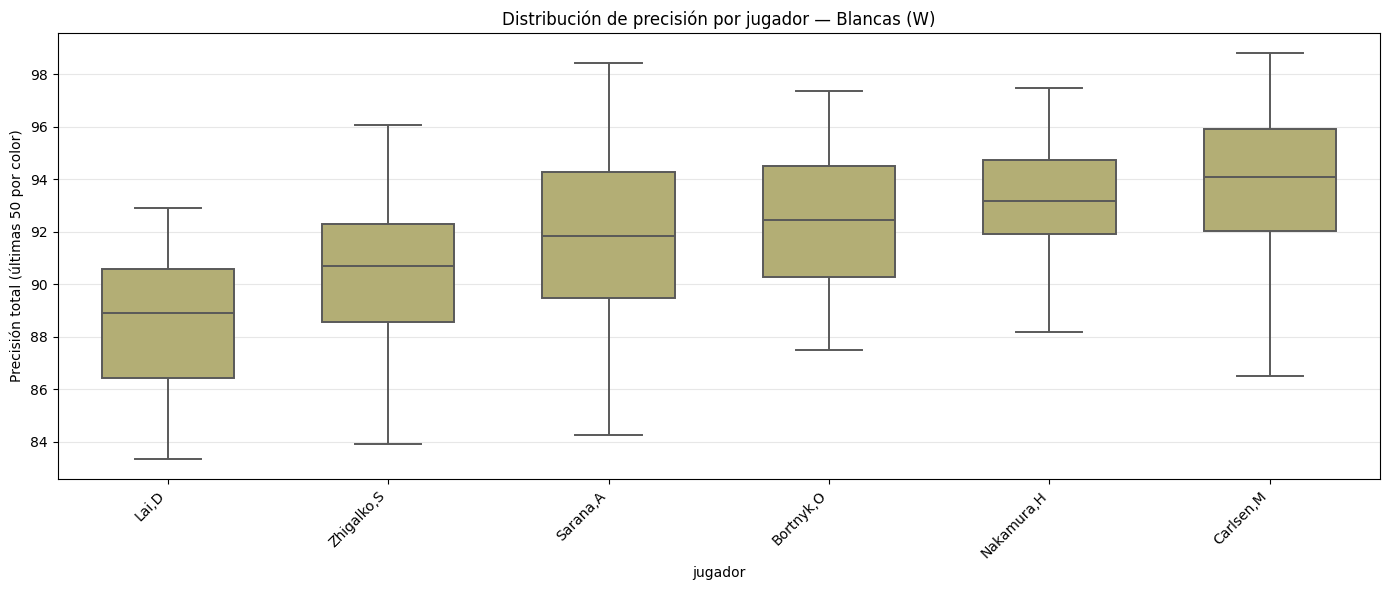

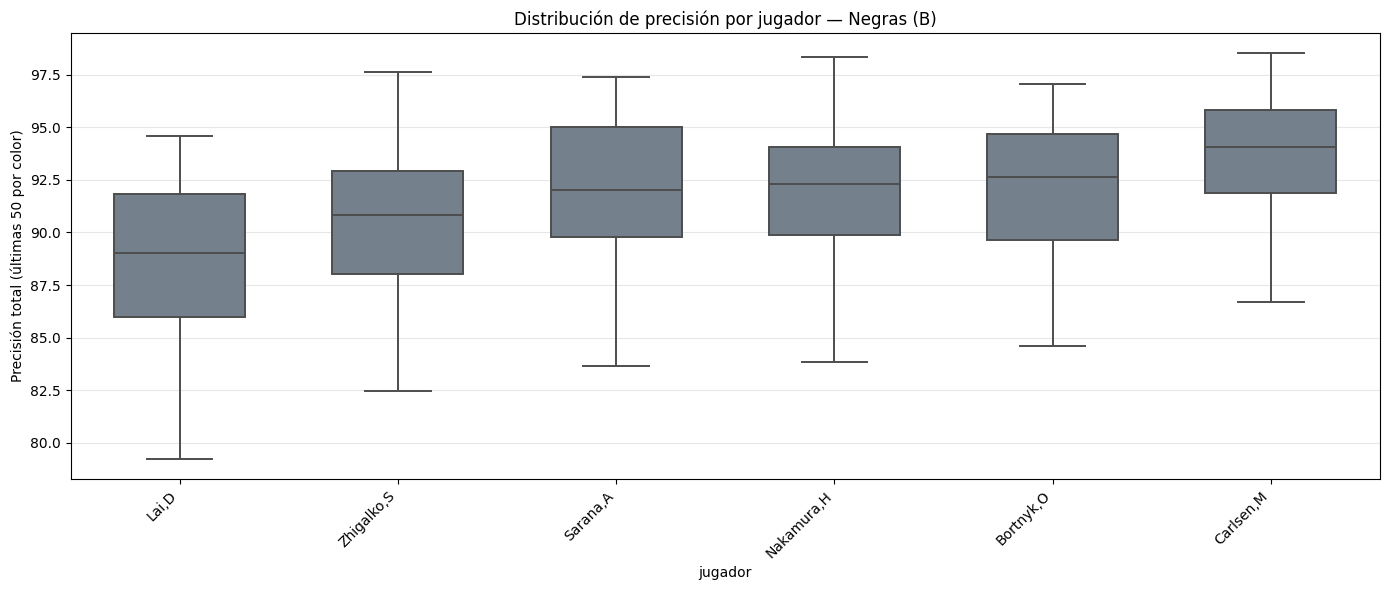

Filtrado y boxplots por color completados. (N = 50)


In [9]:
# ==========================================
# CELDA 2: Filtrado (últimas N por jugador y color) + Boxplots por color
# ==========================================

# --- Parámetros (puedes cambiarlos arriba en tu notebook) ---
LAST_N  = int(globals().get("LAST_N", 50))                 # cuántas partidas por jugador y color
USE_LASTN = bool(globals().get("USE_LASTN", True))          # activar/desactivar filtrado
# compat: si ya usabas USE_LAST100, respetarlo
if "USE_LAST100" in globals():
    USE_LASTN = bool(globals().get("USE_LAST100"))

def _filter_lastN_per_player_per_color(df_in, n=LAST_N):
    """
    Devuelve un DataFrame con las últimas N partidas por jugador dentro de cada color.
    - Si hay columna de fecha (col_fecha), ordena por fecha descendente.
    - Si no hay fecha, usa tail(n) por grupo (asumiendo df ya ordenado por índice/ingreso).
    """
    if not USE_LASTN or n is None or n <= 0:
        return df_in.copy()

    if col_fecha:
        d = (
            df_in
            .sort_values([col_jugador, col_color, col_fecha], ascending=[True, True, False])
            .groupby([col_jugador, col_color], group_keys=False)
            .head(n)
        )
    else:
        # sin fecha: mantener orden de llegada y tomar las últimas N de cada grupo
        d = (
            df_in
            .groupby([col_jugador, col_color], group_keys=False)
            .tail(n)
        )
    return d

# Filtrado principal
dfN = _filter_lastN_per_player_per_color(df, LAST_N)

# Compatibilidad con celdas siguientes (antes usabas df100)
df100 = dfN

for c in COLORS:
    df_c = df100[df100[col_color] == c].copy()
    if df_c.empty:
        print(f"[{c}] No hay datos.")
        continue

    # Orden por mediana de precisión dentro de este color
    order_jug = (
        df_c.groupby(col_jugador)[col_prec_total]
           .median()
           .sort_values(ascending=True)
           .index
           .tolist()
    )

    # --- Boxplot comparativo por color ---
    plt.figure(figsize=(14,6))
    if _HAS_SNS:
        sns.boxplot(
            data=df_c, x=col_jugador, y=col_prec_total,
            order=order_jug, color=PALETTE.get(c, "gray"),
            showfliers=False, width=0.6, linewidth=1.4
        )
    else:
        data = [df_c.loc[df_c[col_jugador]==j, col_prec_total].dropna().values for j in order_jug]
        plt.boxplot(data, showfliers=False)
        plt.xticks(range(1, len(order_jug)+1), order_jug, rotation=45, ha="right")

    plt.xticks(rotation=45, ha="right")
    plt.ylabel(f"Precisión total (últimas {LAST_N} por color)" if USE_LASTN else "Precisión total (todas)")
    titulo_color = "Blancas (W)" if c == "W" else "Negras (B)"
    plt.title(f"Distribución de precisión por jugador — {titulo_color}")
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Guardamos el orden para reusar en Celda 3 (en un dict global)
    globals().setdefault("ORDER_BY_COLOR", {})[c] = order_jug

print(f"Filtrado y boxplots por color completados. (N = {LAST_N if USE_LASTN else 'todas'})")


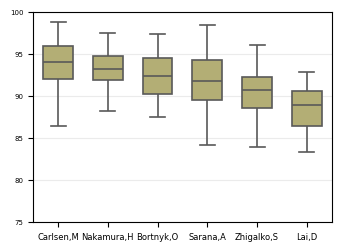

[W] Gráfico guardado en: ./precision_W.png


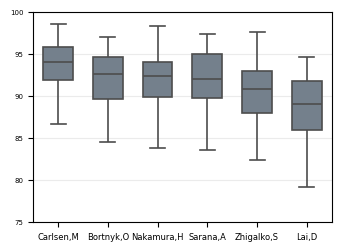

[B] Gráfico guardado en: ./precision_B.png
Filtrado y boxplots por color completados. (N = 50)


In [10]:
# ==========================================
# CELDA 2: Filtrado (últimas N por jugador y color) + Boxplots por color
# Versión para artículo a doble columna:
# - Figura estrecha (una columna)
# - Nombres en X horizontales
# - Sin etiqueta en eje Y
# - Ticks del eje Y más pequeños
# - Jugadores ordenados de mayor a menor precisión (mediana)
# - Eje Y recortado (75–100) para apreciar diferencias
# - Guardado a disco por separado (W / B)
# ==========================================
LAST_N = 50      # o el número que quieras
USE_LASTN = True

# --- Parámetros ---
#LAST_N   = int(globals().get("LAST_N", 100))
#USE_LASTN = bool(globals().get("USE_LASTN", True))

if "USE_LAST100" in globals():
    USE_LASTN = bool(globals().get("USE_LAST100"))

# --- Figura estrecha (una columna) ---
FIG_W     = float(globals().get("FIG_W", 3.3))
FIG_H     = float(globals().get("FIG_H", 2.4))
X_TICK_FS = int(globals().get("X_TICK_FS", 6))
Y_TICK_FS = int(globals().get("Y_TICK_FS", 5))
TITLE_FS  = int(globals().get("TITLE_FS", 8))

# --- Guardado ---
SAVE_DIR = globals().get("SAVE_DIR", ".")   # carpeta destino

def _filter_lastN_per_player_per_color(df_in, n=LAST_N):
    if not USE_LASTN or n is None or n <= 0:
        return df_in.copy()

    if col_fecha:
        d = (
            df_in
            .sort_values([col_jugador, col_color, col_fecha],
                         ascending=[True, True, False])
            .groupby([col_jugador, col_color], group_keys=False)
            .head(n)
        )
    else:
        d = (
            df_in
            .groupby([col_jugador, col_color], group_keys=False)
            .tail(n)
        )
    return d

# Filtrado principal
dfN = _filter_lastN_per_player_per_color(df, LAST_N)
df100 = dfN

for c in COLORS:
    df_c = df100[df100[col_color] == c].copy()
    if df_c.empty:
        print(f"[{c}] No hay datos.")
        continue

    # Orden por mediana (MAYOR → MENOR)
    order_jug = (
        df_c.groupby(col_jugador)[col_prec_total]
            .median()
            .sort_values(ascending=False)
            .index
            .tolist()
    )

    # --- Gráfico ---
    plt.figure(figsize=(FIG_W, FIG_H))

    if _HAS_SNS:
        sns.boxplot(
            data=df_c,
            x=col_jugador,
            y=col_prec_total,
            order=order_jug,
            color=PALETTE.get(c, "gray"),
            showfliers=False,
            width=0.6,
            linewidth=1.2
        )
    else:
        data = [
            df_c.loc[df_c[col_jugador] == j, col_prec_total]
                .dropna().values
            for j in order_jug
        ]
        plt.boxplot(data, showfliers=False)
        plt.xticks(range(1, len(order_jug) + 1), order_jug)

    # Ejes
    plt.xticks(rotation=0, ha="center", fontsize=X_TICK_FS)
    plt.xlabel("")

    plt.yticks(fontsize=Y_TICK_FS)
    plt.ylabel("")
    plt.ylim(75, 100)

    titulo_color = "(White)" if c == "W" else "(Black)"
#    plt.title(f"Precision (%) — {titulo_color}", fontsize=TITLE_FS)

    plt.grid(axis="y", alpha=0.25)
    plt.tight_layout(pad=0.3)

    # --- Guardar a disco ---
    fname = "precision_W.png" if c == "W" else "precision_B.png"
    out_path = f"{SAVE_DIR}/{fname}"
    plt.savefig(out_path, dpi=600, bbox_inches="tight")
    plt.show()

    globals().setdefault("ORDER_BY_COLOR", {})[c] = order_jug
    print(f"[{c}] Gráfico guardado en: {out_path}")

print(f"Filtrado y boxplots por color completados. (N = {LAST_N if USE_LASTN else 'todas'})")


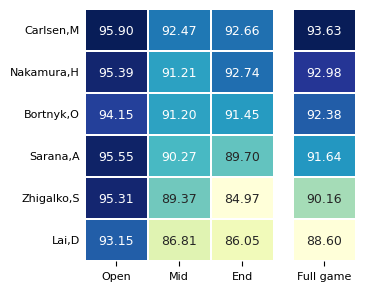

[W] Heatmap guardado como precision_W_fases.png


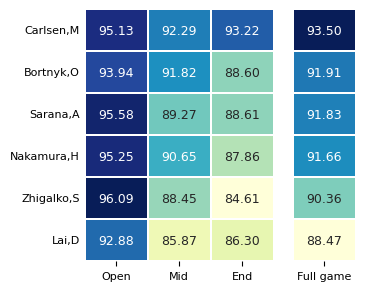

[B] Heatmap guardado como precision_B_fases.png


In [11]:
# ==========================================
# CELDA 3: Heatmaps de precisión por fase + partida completa (W / B)
# - Jugadores seleccionados
# - Ordenados por "Partida completa" descendente
# - Guardado por separado con dpi=600
# ==========================================

jugadores_objetivo = [
    "Carlsen,M",
    "Nakamura,H",
    "Sarana,A",
    "Bortnyk,O",
    "Zhigalko,S",
    "Lai,D"
]

subtitle_n = f"(últimas {LAST_N} partidas por color)" if USE_LASTN else "(todas las partidas)"

phase_cols_present = [
    x for x in [cols_map.get("open"), cols_map.get("mid"), cols_map.get("end")] if x
]

if (phase_cols_present or col_prec_total) and _HAS_SNS:
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import FixedLocator

    BASE_FIG_W = 11.0
    BASE_PER_ROW_H = 0.05
    PER_ROW_H = BASE_PER_ROW_H * 1.25 
    COL_WIDTH_SHRINK = 0.45 * 0.75
    GAP_CM = 0.7
    GAP_IN = GAP_CM / 2.54

    MM_TO_PT = 72.0 / 25.4
    GRID_LW_PT = 0.5 * MM_TO_PT

    for c in COLORS:
        df_c = df100[df100[col_color] == c].copy()
        if df_c.empty:
            print(f"[{c}] Sin datos para heatmap.")
            continue

        df_phase = df_c.groupby(col_jugador)[phase_cols_present].mean()
        df_phase["Partida completa"] = df_c.groupby(col_jugador)[col_prec_total].mean()

        df_phase = df_phase.reindex(jugadores_objetivo)
        df_phase = df_phase.sort_values("Partida completa", ascending=False)
        df_phase.index = df_phase.index.astype(str)

        pretty = phase_pretty if phase_pretty else {x: x for x in phase_cols_present}
        n_rows = len(df_phase.index)
        n_phase = len(phase_cols_present)

        max_name_len = max(len(s) for s in df_phase.index)
        LEFT_PAD = min(0.52, 0.16 + 0.014 * max_name_len)

        base_col_w = BASE_FIG_W / (n_phase + 1)
        col_w = base_col_w * COL_WIDTH_SHRINK
        left_in = max(col_w * n_phase, 0.5)
        right_in = max(col_w, 0.5)
        total_fig_w = left_in + GAP_IN + right_in

        fig = plt.figure(figsize=(total_fig_w, max(3.0, n_rows * PER_ROW_H)))
        gs = fig.add_gridspec(1, 3, width_ratios=[left_in, GAP_IN, right_in], wspace=0)

        ax_left = fig.add_subplot(gs[0, 0])
        ax_gap = fig.add_subplot(gs[0, 1])
        ax_right = fig.add_subplot(gs[0, 2])
        ax_gap.axis("off")

        df_left = df_phase[phase_cols_present]
        df_right = df_phase[["Partida completa"]]

        sns.heatmap(
            df_left,
            annot=True, fmt=".2f", cmap="YlGnBu",
            cbar=False, ax=ax_left,
            linewidths=GRID_LW_PT, linecolor="white",
            annot_kws={"size": 9}
        )

        yticks = np.arange(df_left.shape[0]) + 0.5
        ax_left.yaxis.set_major_locator(FixedLocator(yticks))
        ax_left.set_yticklabels(df_left.index, rotation=0, ha="right")
        ax_left.tick_params(axis="y", labelsize=8, length=0)

        sns.heatmap(
            df_right,
            annot=True, fmt=".2f", cmap="YlGnBu",
            cbar=False, ax=ax_right,
            yticklabels=False,
            linewidths=GRID_LW_PT, linecolor="white",
            annot_kws={"size": 9}
        )

        ax_right.set_ylim(ax_left.get_ylim())

        ax_left.set_xlabel("")
        ax_left.set_ylabel("")
        ax_right.set_xlabel("")
        ax_right.set_ylabel("")

        ax_left.set_xticklabels(["Open", "Mid", "End"], rotation=0)
        ax_right.set_xticklabels(["Full game"], rotation=0)
        ax_left.tick_params(axis="x", labelsize=8)
        ax_right.tick_params(axis="x", labelsize=8)


        titulo_color = "(White)" if c == "W" else "(Black)"
#        fig.suptitle(
#            f"Precision by phase / full game — {titulo_color} {subtitle_n}",
#            y=0.98
#        )

        plt.subplots_adjust(left=LEFT_PAD, right=0.98, top=0.90, bottom=0.06)

        # --- GUARDAR A DISCO ---
        fname = "precision_W_fases.png" if c == "W" else "precision_B_fases.png"
        plt.savefig(fname, dpi=600, bbox_inches="tight")

        plt.show()
        print(f"[{c}] Heatmap guardado como {fname}")

else:
    print("Heatmaps por fase omitidos (columnas o seaborn no disponibles).")


## Volatilidad

In [12]:
# --- 1) Función robusta para parsear evals_all ---
def to_list_evals(x):
    """Convierte 'x' en lista[float]. Soporta list/tuple/np.ndarray/str/número."""
    if isinstance(x, np.ndarray):
        try:
            return [float(v) for v in x.tolist()]
        except Exception:
            return np.nan
    try:
        if pd.isna(x):
            return np.nan
    except Exception:
        pass

    if isinstance(x, (list, tuple)):
        out = []
        for v in x:
            try:
                out.append(float(v))
            except Exception:
                pass
        return out if out else np.nan

    if isinstance(x, (int, float, np.integer, np.floating)):
        return [float(x)]

    if isinstance(x, str):
        s = x.strip()
        if s == "" or s.lower() in {"none", "nan", "na"}:
            return np.nan
        try:
            y = literal_eval(s)
            if isinstance(y, (list, tuple)):
                out = []
                for v in y:
                    try:
                        out.append(float(v))
                    except Exception:
                        pass
                return out if out else np.nan
            # número en texto
            try:
                return [float(s)]
            except Exception:
                return np.nan
        except Exception:
            # fallback: separar por coma/espacio
            sep = "," if "," in s else " "
            parts = [p for p in s.replace("[","").replace("]","").split(sep) if p.strip()]
            out = []
            for p in parts:
                try:
                    out.append(float(p))
                except Exception:
                    pass
            return out if out else np.nan
    return np.nan


# --- 2) Copiar el dataframe y parsear evals_all ---
df_work = df_raw.copy()
df_work["evals_all_parsed"] = df_work["evals_all"].apply(to_list_evals)

# --- 3) Calcular volatilidad y oscilaciones ---
def resumen_partida(evals):
    """Volatilidad (std) y número de oscilaciones de signo."""
    if not isinstance(evals, list) or len(evals) < 2:
        return pd.Series({
            "volatilidad_eval": np.nan,
            "oscilaciones_eval": pd.NA
        })
    arr = np.array(evals, dtype=float)

    # Volatilidad = desviación estándar de las evaluaciones (en peones)
    volatilidad = float(np.std(arr))

    # Oscilaciones de signo (cambios de ventaja)
    signos = np.sign(arr)
    signos_adj = signos.copy()
    last = 0.0
    for i in range(len(signos_adj)):
        if signos_adj[i] == 0 and i > 0:
            signos_adj[i] = last
        if signos_adj[i] != 0:
            last = signos_adj[i]
    oscilaciones = int(np.sum(np.diff(signos_adj) != 0))

    return pd.Series({
        "volatilidad_eval": volatilidad,
        "oscilaciones_eval": oscilaciones
    })

df_temp = df_work["evals_all_parsed"].apply(resumen_partida)
df_work = pd.concat([df_work, df_temp], axis=1)
df_work["oscilaciones_eval"] = df_work["oscilaciones_eval"].astype("Int64")  # entero anulable

# --- 4) Resultado final ---
df_raw = df_work.drop(columns=["evals_all_parsed"])  # reemplaza df_raw con las columnas añadidas

display(df_raw.head())
print("Columnas añadidas: volatilidad_eval, oscilaciones_eval")


,jugador,rival,color,fide_id,elo,elo_rival,evento,lugar,fechas,cod_eco,...,precision,precision_apertura,precision_mediojuego,precision_final,eval,eval_apertura,eval_mediojuego,eval_final,volatilidad_eval,oscilaciones_eval
0,"Carlsen,M","Bezold,M",B,1503014,2831.0,2469.0,World Blitz 2024,New York USA,2024-12-30,A20,...,94.70,96.25,93.24,99.18,1.42,0.07,1.75,5.51,1.879984,11
1,"Firouzja,A","Pichot,A",W,12573981,2763.0,2637.0,World Blitz 2024,New York USA,2024-12-30,C50,...,94.78,97.60,93.01,NaN,1.13,0.25,1.68,NaN,1.027138,0
2,"Nakamura,H","Nesterov,Arseniy",B,2016192,2802.0,2599.0,World Blitz 2024,New York USA,2024-12-30,D31,...,96.80,98.37,95.51,99.67,0.40,-0.18,0.28,4.30,1.197582,5
3,"Caruana,F","Harsha,B",B,2020009,2805.0,2531.0,World Blitz 2024,New York USA,2024-12-30,D38,...,93.59,97.97,90.31,NaN,0.78,-0.18,1.51,NaN,1.703864,13
4,"Nepomniachtchi,I","Andersen,Mad",B,4168119,2755.0,2592.0,World Blitz 2024,New York USA,2024-12-30,B40,...,94.49,96.20,93.20,96.65,1.84,-0.36,2.70,5.70,2.533811,5


Columnas añadidas: volatilidad_eval, oscilaciones_eval


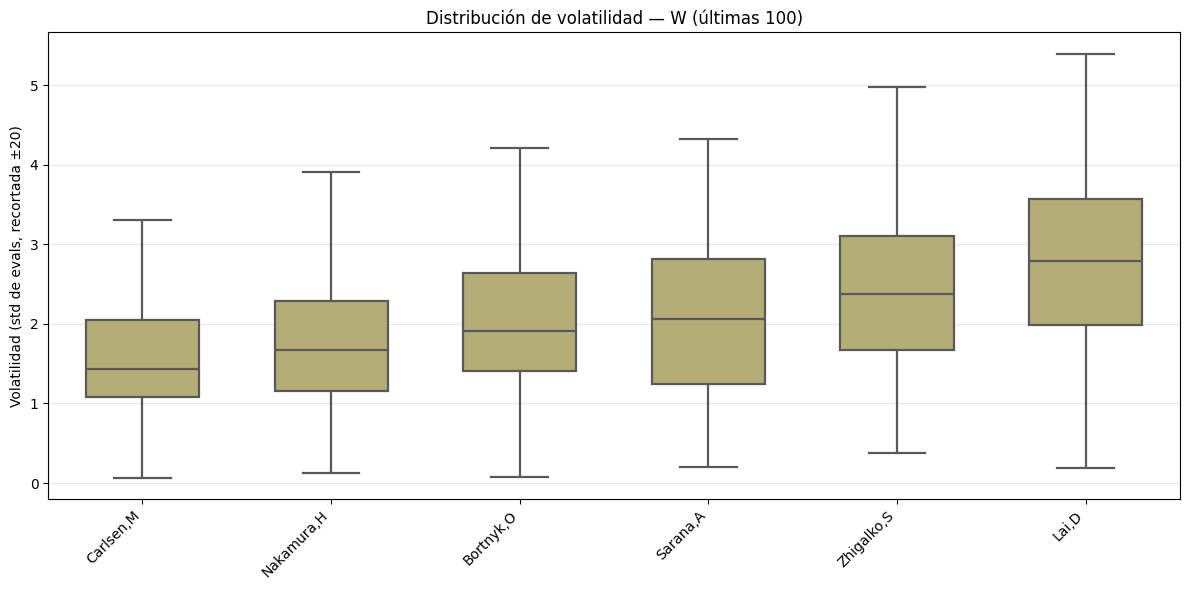

[W] Jugadores mostrados: 6
[W] Partidas usadas: 600


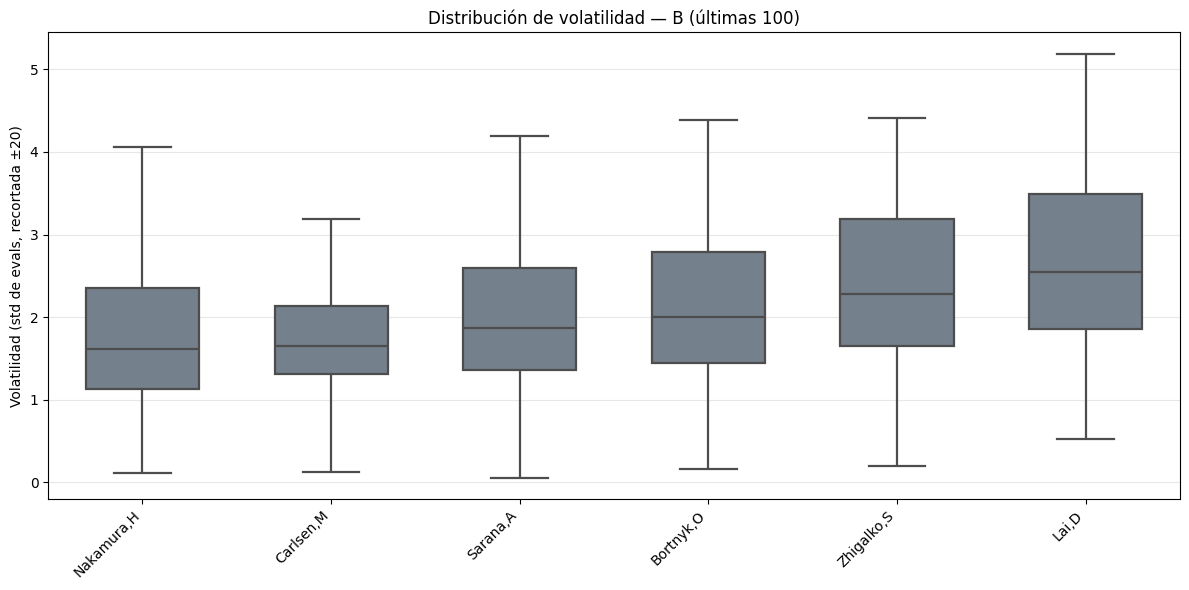

[B] Jugadores mostrados: 6
[B] Partidas usadas: 600


In [13]:
# ==========================================
# Comparativas de volatilidad solo para jugadores objetivo
# - Boxplot por color (W/B)
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

USE_LAST100 = True  # limitar a últimas 100 por jugador
COLORS = ["W", "B"] # Blancas y Negras
CLIP_VOL = 20       # recorte visual de volatilidad para boxplot

# Lista de jugadores que se quieren mostrar
jugadores_objetivo = [
    "Carlsen,M",
    "Nakamura,H",
    "Sarana,A",
    "Bortnyk,O",
    "Zhigalko,S",
    "Lai,D"
]

#jugadores_objetivo = [
#    "Carlsen,M", "Nakamura,Hi", "Nepomniachtchi,I", "Caruana,F", "Lai,Duc Minh",
#    "Niemann,Hans Moke", "Firouzja,Alireza", "Vlassov,N", "Sarana,A",
#    "Rustemov,A", "Andreikin,D", "Bluebaum,M", "Zhigalko,S", "Bortnyk,Olexandr"
#]

df_base = df_raw.copy()

# Tipos correctos
if "oscilaciones_eval" in df_base.columns:
    df_base["oscilaciones_eval"] = pd.to_numeric(df_base["oscilaciones_eval"], errors="coerce")

# Filas válidas
df_base = df_base[
    df_base["volatilidad_eval"].notna()
].copy()

# Filtrar solo los jugadores objetivo
df_base = df_base[df_base["jugador"].isin(jugadores_objetivo)].copy()

# Conversión de fecha si existe
if "fechas" in df_base.columns:
    df_base["fechas"] = pd.to_datetime(df_base["fechas"], errors="coerce")


def plot_por_color(df_color, color_label):
    """Genera solo el boxplot de volatilidad para los jugadores objetivo de un color dado."""
    df_plot = df_color.copy()
    if df_plot.empty:
        print(f"[{color_label}] No hay datos para este color.")
        return

    # Tomar últimas 100 partidas por jugador (si hay fecha, por fecha; si no, por orden actual)
    if USE_LAST100:
        if "fechas" in df_plot.columns:
            df_plot = df_plot.sort_values(["jugador", "fechas"], ascending=[True, False])
            df_plot = df_plot.groupby("jugador", group_keys=False).head(100)
        else:
            df_plot = df_plot.groupby("jugador", group_keys=False).tail(100)

    if df_plot.empty:
        print(f"[{color_label}] Tras filtrar últimas 100 no quedan datos.")
        return

    # Orden por mediana de volatilidad (por color)
    orden_jug = (
        df_plot.groupby("jugador")["volatilidad_eval"]
        .median()
        .sort_values(ascending=True)
        .index
        .tolist()
    )

    # --- Boxplot de volatilidad (recortado a ±CLIP_VOL) ---
    plt.figure(figsize=(12, 6))
    vol_to_plot = df_plot.copy()
    vol_to_plot["volatilidad_eval_clipped"] = vol_to_plot["volatilidad_eval"].clip(-CLIP_VOL, CLIP_VOL)

    try:
        import seaborn as sns
        # Colores distintos por color de pieza
        color_box = "darkkhaki" if color_label == "W" else "slategray"

        sns.boxplot(
            data=vol_to_plot,
            x="jugador",
            y="volatilidad_eval_clipped",
            order=orden_jug,
            showfliers=False,
            linewidth=1.6,
            width=0.6,
            color=color_box
        )
    except Exception:
        # fallback sin seaborn
        data = [vol_to_plot.loc[vol_to_plot["jugador"] == j, "volatilidad_eval_clipped"].values for j in orden_jug]
        plt.boxplot(data, showfliers=False)
        plt.xticks(range(1, len(orden_jug)+1), orden_jug, rotation=45, ha="right")

    plt.xticks(rotation=45, ha="right")
    plt.ylabel(f"Volatilidad (std de evals, recortada ±{CLIP_VOL})")
    plt.xlabel("")
    plt.title(f"Distribución de volatilidad — {color_label} ({'últimas 100' if USE_LAST100 else 'todas'})")
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Info
    print(f"[{color_label}] Jugadores mostrados: {len(orden_jug)}")
    print(f"[{color_label}] Partidas usadas: {len(df_plot)}")


# =========================
# Ejecutar para W y B
# =========================
if "color" not in df_base.columns:
    raise RuntimeError("El DataFrame no contiene la columna 'color' con valores 'W'/'B'.")

for c in COLORS:
    df_c = df_base[df_base["color"] == c]
    plot_por_color(df_c, c)


[W] Guardado en: violin_volatilidad_W.png (dpi=600)


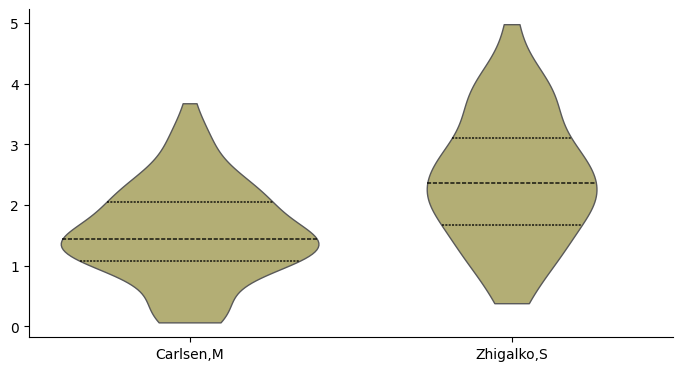

[W] Jugadores mostrados: 2
[W] Partidas usadas: 200
[B] Guardado en: violin_volatilidad_B.png (dpi=600)


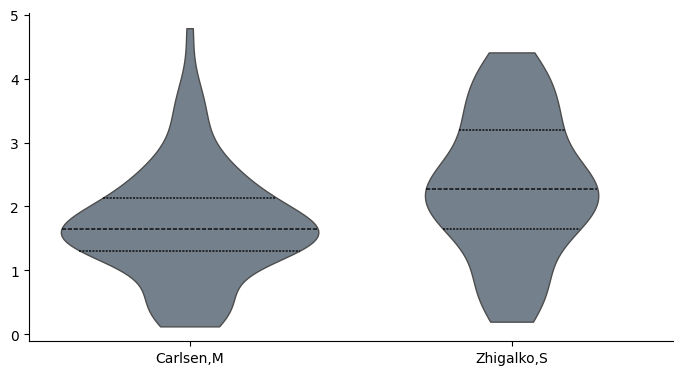

[B] Jugadores mostrados: 2
[B] Partidas usadas: 200


In [14]:
# ==========================================
# Comparativas de volatilidad (violín) para jugadores objetivo
# - Gráfico separado por color (W/B)
# - Guardado a PNG con dpi=600
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

USE_LAST100 = True   # limitar a últimas 100 por jugador
COLORS = ["W", "B"]  # Blancas y Negras
CLIP_VOL = 20        # recorte visual de volatilidad para el gráfico
LAST_N = 100   # número de partidas a considerar por jugador y color


# Carpeta/archivo de salida
OUT_PREFIX = "violin_volatilidad"   # genera: violin_volatilidad_W.png y violin_volatilidad_B.png
DPI_SAVE = 600
SHOW_PLOTS = True  # pon False si solo quieres guardar sin mostrar

# Lista de jugadores a mostrar
jugadores_objetivo = [
    "Carlsen,M", "Zhigalko,S"
]

df_base = df_raw.copy()

# Tipos correctos
if "oscilaciones_eval" in df_base.columns:
    df_base["oscilaciones_eval"] = pd.to_numeric(df_base["oscilaciones_eval"], errors="coerce")

# Filtrado esencial y por jugadores
df_base = df_base[df_base["volatilidad_eval"].notna()].copy()
df_base = df_base[df_base["jugador"].isin(jugadores_objetivo)].copy()

# Conversión de fecha si existe
if "fechas" in df_base.columns:
    df_base["fechas"] = pd.to_datetime(df_base["fechas"], errors="coerce")

def enfatizar_cuartiles(ax, lw_mediana=1.2, lw_cuartil=1.2, color="black"):
    """
    Aumenta grosor y contraste de mediana y cuartiles dibujados por seaborn (inner='quartile').
    """
    for line in ax.lines:
        line.set_color(color)
        # La mediana suele ser la línea más larga → la hacemos un poco más gruesa
        xdata = line.get_xdata()
        if xdata is not None and len(xdata) == 2 and abs(xdata[1] - xdata[0]) > 0.4:
            line.set_linewidth(lw_mediana)
        else:
            line.set_linewidth(lw_cuartil)
        line.set_alpha(0.8)


def _order_players_by_median(df_plot):
    """Ordena jugadores por mediana de volatilidad ascendente."""
    return (
        df_plot.groupby("jugador")["volatilidad_eval"]
        .median()
        .sort_values(ascending=True)
        .index
        .tolist()
    )


def _matplotlib_violin(ax, df_plot, orden_jug, color_face, clip_val):
    """
    Fallback sin seaborn: dibuja violines con matplotlib y superpone mediana + IQR.
    """
    data = [
        df_plot.loc[df_plot["jugador"] == j, "volatilidad_eval"]
        .clip(-clip_val, clip_val)
        .dropna()
        .values
        for j in orden_jug
    ]

    vio = ax.violinplot(
        data,
        showmeans=False,
        showextrema=False,
        showmedians=False
    )

    for b in vio["bodies"]:
        b.set_facecolor(color_face)
        b.set_edgecolor("black")
        b.set_alpha(0.8)
        b.set_linewidth(0.8)

    percentiles = []
    for arr in data:
        if arr.size == 0:
            percentiles.append((np.nan, np.nan, np.nan))
        else:
            percentiles.append((
                np.nanpercentile(arr, 25),
                np.nanpercentile(arr, 50),
                np.nanpercentile(arr, 75),
            ))

    for i, (q25, med, q75) in enumerate(percentiles, start=1):
        if not np.isnan(med):
            ax.plot([i-0.18, i+0.18], [med, med], lw=2, color="black")
        if not (np.isnan(q25) or np.isnan(q75)):
            ax.plot([i, i], [q25, q75], lw=6, solid_capstyle="butt", color="black", alpha=0.6)

    ax.set_xticks(range(1, len(orden_jug)+1))
    ax.set_xticklabels(orden_jug, rotation=0, ha="right")


def plot_por_color_violin(df_color, color_label, out_path=None, dpi_save=600, show=True):
    """Genera el gráfico de violín para un color dado y lo guarda si se indica out_path."""
    df_plot = df_color.copy()
    if df_plot.empty:
        print(f"[{color_label}] No hay datos para este color.")
        return

    # Limitar a últimas 100 por jugador (si se desea)
    if USE_LAST100:
        if "fechas" in df_plot.columns:
            df_plot = df_plot.sort_values(["jugador", "fechas"], ascending=[True, False])
            df_plot = df_plot.groupby("jugador", group_keys=False).head(LAST_N)
        else:
            df_plot = df_plot.groupby("jugador", group_keys=False).tail(LAST_N)

    if df_plot.empty:
        print(f"[{color_label}] Tras filtrar últimas 100 no quedan datos.")
        return

    # Orden por mediana
    orden_jug = _order_players_by_median(df_plot)

    # Preparar figura (importante: guardar usando el objeto fig)
    fig = plt.figure(figsize=(7, 4))
    ax = plt.gca()

    color_face = "darkkhaki" if color_label == "W" else "slategray"

    try:
        import seaborn as sns
        dfp = df_plot.copy()
        dfp["vol_clip"] = dfp["volatilidad_eval"].clip(-CLIP_VOL, CLIP_VOL)

        sns.violinplot(
            data=dfp,
            x="jugador",
            y="vol_clip",
            order=orden_jug,
            inner="quartile",
            cut=0,
            bw_method="scott",
            linewidth=1.0,
            fill=True,
            color=color_face
        )

        #  ticks centrados exactamente en las posiciones de seaborn (0..n-1)
        ax.set_xticks(np.arange(len(orden_jug)))
        ax.set_xticklabels(orden_jug, rotation=0, ha="center")

        enfatizar_cuartiles(ax)

    except Exception:
        _matplotlib_violin(ax, df_plot, orden_jug, color_face=color_face, clip_val=CLIP_VOL)


    ax.set_anchor('C')

    # --- Estética final ---
    plt.ylabel("")
    plt.xlabel("")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Fuerza el centrado de categorías (seaborn usa 0..n-1)
    ax.set_xlim(-0.5, len(orden_jug) - 0.5)


    # Quita márgenes automáticos extra
    ax.margins(x=0)

    # En vez de tight_layout (que a veces deja aire raro), ajusta manualmente
    fig.subplots_adjust(left=0.06, right=0.98, bottom=0.16, top=0.98)

    # --- Guardar (dpi=600) ---
    if out_path:
        fig.savefig(out_path, dpi=dpi_save, bbox_inches=None, pad_inches=0.02)
        # imprime DESPUÉS (no afecta al layout del canvas)
        print(f"[{color_label}] Guardado en: {out_path} (dpi={dpi_save})")

    if show:
        plt.show()
    else:
        plt.close(fig)


    print(f"[{color_label}] Jugadores mostrados: {len(orden_jug)}")
    print(f"[{color_label}] Partidas usadas: {len(df_plot)}")


# =========================
# Ejecutar y guardar W y B
# =========================
if "color" not in df_base.columns:
    raise RuntimeError("El DataFrame no contiene la columna 'color' con valores 'W'/'B'.")

for c in COLORS:
    df_c = df_base[df_base["color"] == c]
    out_file = f"{OUT_PREFIX}_{c}.png"
    plot_por_color_violin(df_c, c, out_path=out_file, dpi_save=DPI_SAVE, show=SHOW_PLOTS)


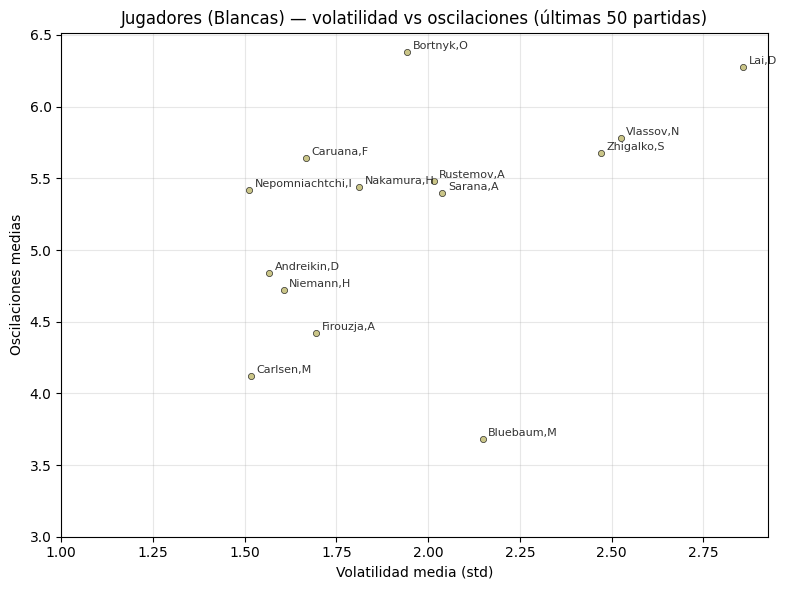

Blancas: 14 jugadores, 700 partidas


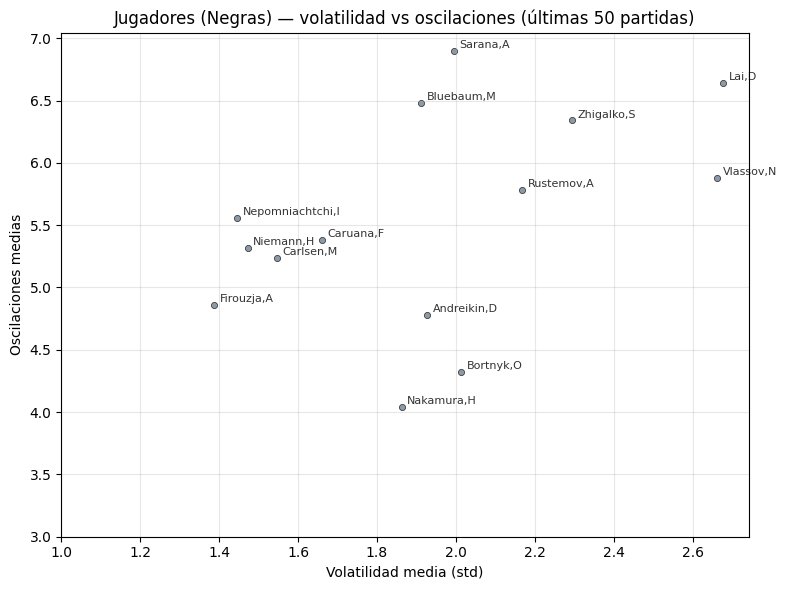

Negras: 14 jugadores, 700 partidas


In [15]:
# ==========================================
# Dispersión separada por color:
# Volatilidad media vs oscilaciones medias
# Últimas 50 partidas, tamaño fijo, ejes ajustados
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración
colores = {"W": "darkkhaki", "B": "slategray"}
N_ULTIMAS = 50  # número de partidas recientes por jugador y color
POINT_SIZE = 20  # tamaño fijo del punto

df_plot = df_raw.copy()

# --- Preparación de datos ---
df_plot["oscilaciones_eval"] = pd.to_numeric(df_plot["oscilaciones_eval"], errors="coerce")
df_plot["volatilidad_eval"] = pd.to_numeric(df_plot["volatilidad_eval"], errors="coerce")

# Filtrar filas válidas y con color
df_plot = df_plot[
    df_plot["volatilidad_eval"].notna() &
    df_plot["oscilaciones_eval"].notna() &
    df_plot["color"].isin(["W", "B"])
].copy()

# Limitar a últimas N partidas por jugador y color
if "fechas" in df_plot.columns:
    df_plot["fechas"] = pd.to_datetime(df_plot["fechas"], errors="coerce")
    df_plot = df_plot.sort_values(["jugador", "color", "fechas"], ascending=[True, True, False])
    df_plot = df_plot.groupby(["jugador", "color"], group_keys=False).head(N_ULTIMAS)
else:
    df_plot = df_plot.groupby(["jugador", "color"], group_keys=False).tail(N_ULTIMAS)

# --- Cálculo agregado por jugador y color ---
res = (
    df_plot.groupby(["jugador", "color"])
    .agg(vol_mean=("volatilidad_eval", "mean"),
         osc_mean=("oscilaciones_eval", "mean"),
         n=("oscilaciones_eval", "size"))
    .reset_index()
)

# --- Función de gráfico por color ---
def scatter_por_color(res, color, color_name):
    sub = res[res["color"] == color]
    if sub.empty:
        print(f"Sin datos para {color_name}")
        return

    plt.figure(figsize=(8, 6))
    plt.scatter(sub["vol_mean"], sub["osc_mean"],
                s=POINT_SIZE,  # tamaño fijo para todos
                alpha=0.8,
                color=colores[color],
                edgecolors="black",
                linewidths=0.5)

    # Etiquetas de jugadores
    for _, r in sub.iterrows():
        plt.annotate(r["jugador"], (r["vol_mean"], r["osc_mean"]),
                     xytext=(4, 2), textcoords="offset points", fontsize=8, alpha=0.8)

    plt.xlabel("Volatilidad media (std)")
    plt.ylabel("Oscilaciones medias")
    plt.title(f"Jugadores ({color_name}) — volatilidad vs oscilaciones (últimas {N_ULTIMAS} partidas)")
    plt.grid(alpha=0.3)

    # Ejes comenzando en 1 y 3
    plt.xlim(left=1)
    plt.ylim(bottom=3)

    plt.tight_layout()
    plt.show()

    print(f"{color_name}: {len(sub)} jugadores, {sub['n'].sum()} partidas")

# --- Generar gráficos ---
scatter_por_color(res, "W", "Blancas")
scatter_por_color(res, "B", "Negras")


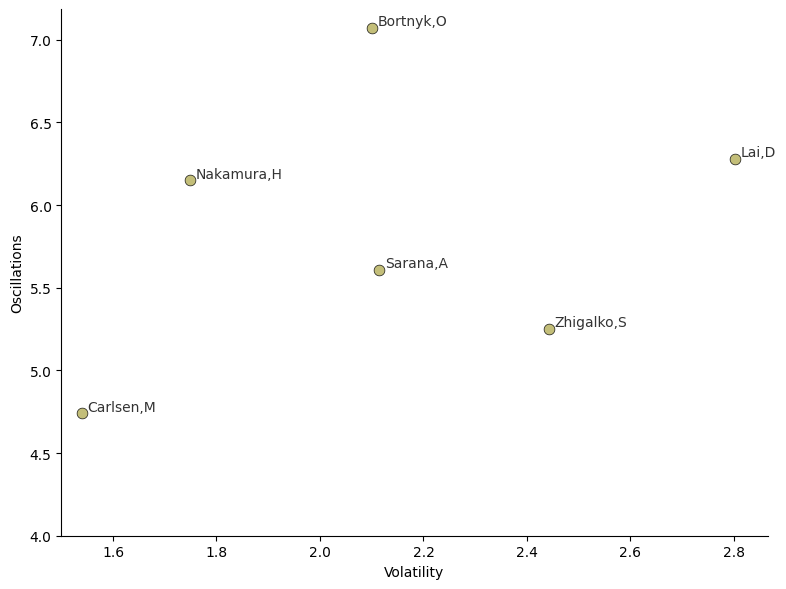

Blancas: 6 jugadores, 600 partidas


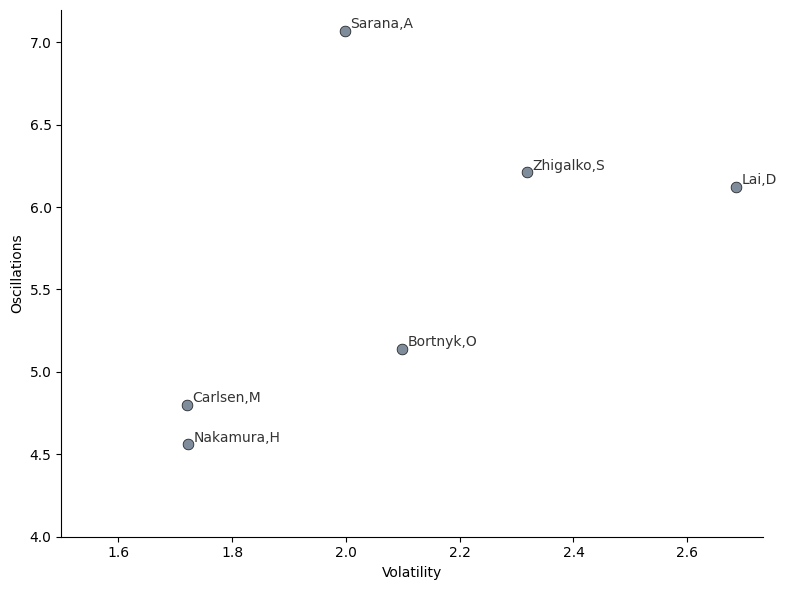

Negras: 6 jugadores, 600 partidas


In [16]:
# ==========================================
# Dispersión separada por color:
# Volatilidad media vs oscilaciones medias
# SOLO jugadores objetivo — Últimas 50 partidas
# Tamaño fijo, ejes ajustados
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Configuración ---
colores = {"W": "darkkhaki", "B": "slategray"}
N_ULTIMAS = 100   # número de partidas recientes por jugador y color
POINT_SIZE = 60  # 

jugadores_objetivo = [
    "Carlsen,M",
    "Nakamura,H",
    "Sarana,A",
    "Bortnyk,O",
    "Zhigalko,S",
    "Lai,D"
]

df_plot = df_raw.copy()

# --- Preparación de datos ---
df_plot["oscilaciones_eval"] = pd.to_numeric(df_plot["oscilaciones_eval"], errors="coerce")
df_plot["volatilidad_eval"] = pd.to_numeric(df_plot["volatilidad_eval"], errors="coerce")

# Filtrar SOLO jugadores objetivo + filas válidas + color
df_plot = df_plot[
    df_plot["jugador"].isin(jugadores_objetivo) &
    df_plot["volatilidad_eval"].notna() &
    df_plot["oscilaciones_eval"].notna() &
    df_plot["color"].isin(["W", "B"])
].copy()

# Limitar a últimas N partidas por jugador y color
if "fechas" in df_plot.columns:
    df_plot["fechas"] = pd.to_datetime(df_plot["fechas"], errors="coerce")
    df_plot = df_plot.sort_values(
        ["jugador", "color", "fechas"],
        ascending=[True, True, False],
        na_position="last"
    )
    df_plot = df_plot.groupby(["jugador", "color"], group_keys=False).head(N_ULTIMAS)
else:
    df_plot = df_plot.groupby(["jugador", "color"], group_keys=False).tail(N_ULTIMAS)

# --- Cálculo agregado por jugador y color ---
res = (
    df_plot.groupby(["jugador", "color"])
    .agg(
        vol_mean=("volatilidad_eval", "mean"),
        osc_mean=("oscilaciones_eval", "mean"),
        n=("oscilaciones_eval", "size")
    )
    .reset_index()
)

res["jugador"] = pd.Categorical(res["jugador"], categories=jugadores_objetivo, ordered=True)
res = res.sort_values(["jugador", "color"])

# --- Función de gráfico por color ---
def scatter_por_color(res, color, color_name):
    sub = res[res["color"] == color]
    if sub.empty:
        print(f"Sin datos para {color_name}")
        return

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.scatter(
        sub["vol_mean"], sub["osc_mean"],
        s=POINT_SIZE,
        alpha=0.9,
        color=colores[color],
        edgecolors="black",
        linewidths=0.5
    )

    # Etiquetas de jugadores
    for _, r in sub.iterrows():
        ax.annotate(
            r["jugador"],
            (r["vol_mean"], r["osc_mean"]),
            xytext=(4, 2),
            textcoords="offset points",
            fontsize=10,
            alpha=0.8
        )

    ax.set_xlabel("Volatility")
    ax.set_ylabel("Oscillations")
#    ax.set_title(
#        f"Jugadores objetivo ({color_name}) — volatilidad vs oscilaciones "
#        f"(últimas {N_ULTIMAS} partidas)"
#    )

    # Eliminar rejilla
    ax.grid(False)

    # Eliminar recuadro exterior (solo ejes X e Y)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Límites de ejes
    ax.set_xlim(left=1.5)
    ax.set_ylim(bottom=4)

    # --- Guardar figura ---
    filename = f"scatter_vol_osc_{color}.png"
    plt.savefig(filename, dpi=600, bbox_inches="tight")

    plt.tight_layout()
    plt.show()

    print(f"{color_name}: {len(sub)} jugadores, {int(sub['n'].sum())} partidas")

# --- Generar gráficos ---
scatter_por_color(res, "W", "Blancas")
scatter_por_color(res, "B", "Negras")


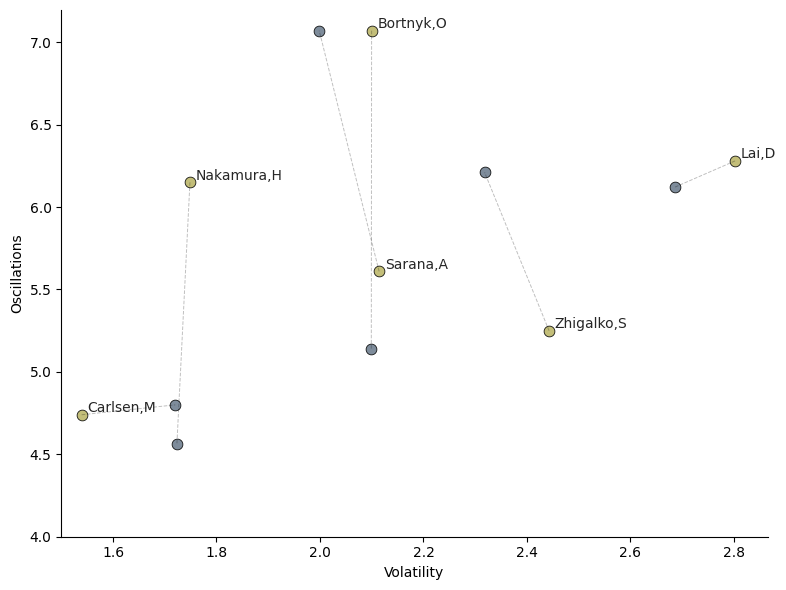

Total puntos: 12 (jugador-color). Total partidas agregadas: 1200


In [17]:
# ==========================================
# Scatter combinado (W + B):
# Volatilidad media vs oscilaciones medias
# SOLO jugadores objetivo — últimas N partidas
# Tamaño fijo, ejes ajustados
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Configuración ---
colores = {"W": "darkkhaki", "B": "slategray"}
N_ULTIMAS = 100   # número de partidas recientes por jugador y color
POINT_SIZE = 60

jugadores_objetivo = [
    "Carlsen,M",
    "Nakamura,H",
    "Sarana,A",
    "Bortnyk,O",
    "Zhigalko,S",
    "Lai,D"
]

df_plot = df_raw.copy()

# --- Preparación de datos ---
df_plot["oscilaciones_eval"] = pd.to_numeric(df_plot["oscilaciones_eval"], errors="coerce")
df_plot["volatilidad_eval"] = pd.to_numeric(df_plot["volatilidad_eval"], errors="coerce")

# Filtrar SOLO jugadores objetivo + filas válidas + color
df_plot = df_plot[
    df_plot["jugador"].isin(jugadores_objetivo) &
    df_plot["volatilidad_eval"].notna() &
    df_plot["oscilaciones_eval"].notna() &
    df_plot["color"].isin(["W", "B"])
].copy()

# Limitar a últimas N partidas por jugador y color
if "fechas" in df_plot.columns:
    df_plot["fechas"] = pd.to_datetime(df_plot["fechas"], errors="coerce")
    df_plot = df_plot.sort_values(
        ["jugador", "color", "fechas"],
        ascending=[True, True, False],
        na_position="last"
    )
    df_plot = df_plot.groupby(["jugador", "color"], group_keys=False).head(N_ULTIMAS)
else:
    df_plot = df_plot.groupby(["jugador", "color"], group_keys=False).tail(N_ULTIMAS)

# --- Cálculo agregado por jugador y color ---
res = (
    df_plot.groupby(["jugador", "color"])
    .agg(
        vol_mean=("volatilidad_eval", "mean"),
        osc_mean=("oscilaciones_eval", "mean"),
        n=("oscilaciones_eval", "size")
    )
    .reset_index()
)

res["jugador"] = pd.Categorical(res["jugador"], categories=jugadores_objetivo, ordered=True)
res = res.sort_values(["jugador", "color"])

# ==========================================
# Gráfico combinado
# ==========================================
fig, ax = plt.subplots(figsize=(8, 6))

# Pintar puntos por color (para que haya una sola leyenda clara)
for c, nombre in [("W", "White"), ("B", "Black")]:
    sub = res[res["color"] == c]
    if sub.empty:
        continue
    ax.scatter(
        sub["vol_mean"], sub["osc_mean"],
        s=POINT_SIZE,
        alpha=0.9,
        color=colores[c],
        edgecolors="black",
        linewidths=0.6,
        label=nombre
    )

# Línea W<->B por jugador (si existen ambos)
# y etiqueta una sola vez por jugador
res_w = res[res["color"] == "W"][["jugador", "vol_mean", "osc_mean"]].rename(
    columns={"vol_mean": "vol_w", "osc_mean": "osc_w"}
)
res_b = res[res["color"] == "B"][["jugador", "vol_mean", "osc_mean"]].rename(
    columns={"vol_mean": "vol_b", "osc_mean": "osc_b"}
)

wide = pd.merge(res_w, res_b, on="jugador", how="outer")

for _, r in wide.iterrows():
    jw = pd.notna(r.get("vol_w")) and pd.notna(r.get("osc_w"))
    jb = pd.notna(r.get("vol_b")) and pd.notna(r.get("osc_b"))

    # Línea si hay ambos puntos
    if jw and jb:
        ax.plot(
            [r["vol_w"], r["vol_b"]],
            [r["osc_w"], r["osc_b"]],
            linestyle="--",
            linewidth=0.7,
            alpha=0.25,
            color="black"
        )

    # Etiqueta (prioriza Blancas; si no, Negras)
    if jw:
        x, y = r["vol_w"], r["osc_w"]
    elif jb:
        x, y = r["vol_b"], r["osc_b"]
    else:
        continue

    ax.annotate(
        str(r["jugador"]),
        (x, y),
        xytext=(4, 2),
        textcoords="offset points",
        fontsize=10,
        alpha=0.85
    )

# Estilo de ejes (igual que tu versión)
ax.set_xlabel("Volatility")
ax.set_ylabel("Oscillations")
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Límites de ejes
ax.set_xlim(left=1.5)
ax.set_ylim(bottom=4)

# Leyenda
# ax.legend(frameon=True, loc="best")

# Guardar
filename = "scatter_vol_osc_WB.png"
plt.savefig(filename, dpi=600, bbox_inches="tight")

plt.tight_layout()
plt.show()

print(
    f"Total puntos: {len(res)} (jugador-color). "
    f"Total partidas agregadas: {int(res['n'].sum())}"
)


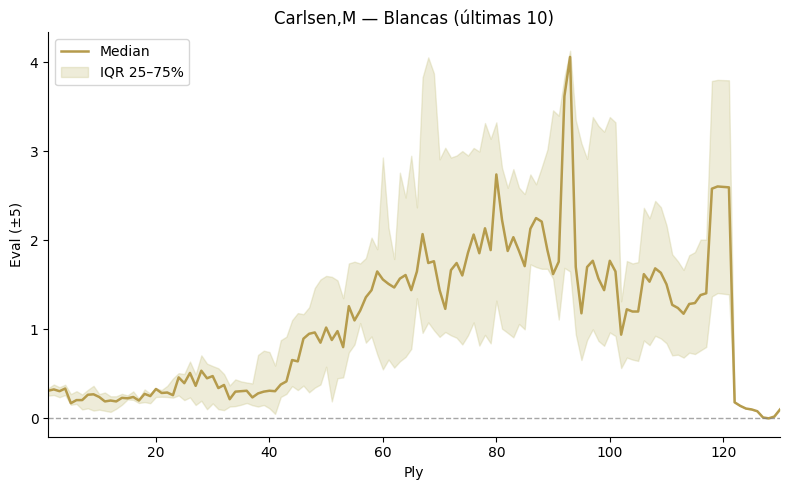

Carlsen,M Blancas: partidas usadas = 10
Archivo guardado: eval_trajectory_W.png


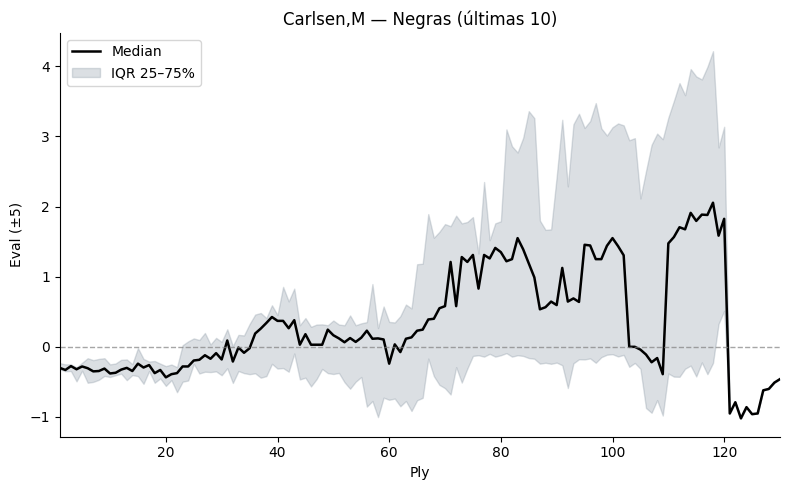

Carlsen,M Negras: partidas usadas = 10
Archivo guardado: eval_trajectory_B.png


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

# =========================
# Utilidades base
# =========================
def _to_list_evals(x):
    if isinstance(x, np.ndarray):
        try:
            return [float(v) for v in x.tolist()]
        except Exception:
            return np.nan
    try:
        if pd.isna(x):
            return np.nan
    except Exception:
        pass

    if isinstance(x, (list, tuple)):
        out = []
        for v in x:
            try:
                out.append(float(v))
            except Exception:
                pass
        return out if out else np.nan

    if isinstance(x, (int, float, np.integer, np.floating)):
        return [float(x)]

    if isinstance(x, str):
        s = x.strip()
        if s == "" or s.lower() in {"none", "nan", "na"}:
            return np.nan
        try:
            y = literal_eval(s)
            if isinstance(y, (list, tuple)):
                out = []
                for v in y:
                    try:
                        out.append(float(v))
                    except Exception:
                        pass
                return out if out else np.nan
            try:
                return [float(s)]
            except Exception:
                return np.nan
        except Exception:
            sep = "," if "," in s else " "
            parts = [p for p in s.replace("[", "").replace("]", "").split(sep) if p.strip()]
            out = []
            for p in parts:
                try:
                    out.append(float(p))
                except Exception:
                    pass
            return out if out else np.nan
    return np.nan


def _get_last_n_by_player_and_color(
    df_raw, jugador, color, n=100,
    col_evals="evals_all", col_fecha="fechas", clip_abs=15.0
):
    d = df_raw[
        (df_raw["jugador"] == jugador) &
        (df_raw.get("color", pd.Series(index=df_raw.index)).eq(color))
    ].copy()

    if col_fecha in d.columns:
        d[col_fecha] = pd.to_datetime(d[col_fecha], errors="coerce")
        d = d.sort_values(col_fecha, ascending=False)

    d = d.head(n).copy()
    d["evals_all_list"] = d[col_evals].apply(_to_list_evals)
    d = d[d["evals_all_list"].apply(lambda x: isinstance(x, list) and len(x) >= 2)].copy()

    clip = float(clip_abs)
    d["evals_all_list"] = d["evals_all_list"].apply(
        lambda lst: np.clip(np.asarray(lst, float), -clip, clip).tolist()
    )
    d.reset_index(drop=True, inplace=True)
    return d


def _pack_to_matrix(evals_lists, max_ply=None):
    if not evals_lists:
        return np.empty((0, 0))
    L = max(len(x) for x in evals_lists) if max_ply is None else int(max_ply)
    M = len(evals_lists)
    mat = np.full((L, M), np.nan, dtype=float)
    for j, lst in enumerate(evals_lists):
        k = min(len(lst), L)
        if k > 0:
            mat[:k, j] = np.asarray(lst[:k], dtype=float)
    return mat


# =========================
# Gráfico: Mediana + IQR
# =========================
def plot_player_median_iqr_save(
    df_raw,
    jugador,
    color,
    n=100,
    max_ply=120,
    clip_abs=15.0,
    col_evals="evals_all",
    col_fecha="fechas",
    dpi=600,
    outname=None
):
    if color == "W":
        color_name = "Blancas"
        color_line = "#b59b4c"
        color_fill = "darkkhaki"
    else:
        color_name = "Negras"
        color_line = "black"
        color_fill = "slategray"

    dfc = _get_last_n_by_player_and_color(
        df_raw, jugador, color,
        n=n, col_evals=col_evals,
        col_fecha=col_fecha, clip_abs=clip_abs
    )

    fig, ax = plt.subplots(figsize=(8, 5))

    series = dfc["evals_all_list"].tolist()
    if not series:
        ax.text(0.5, 0.5, "Sin partidas", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()
    else:
        mat = _pack_to_matrix(series, max_ply=max_ply)
        if mat.size == 0:
            ax.text(0.5, 0.5, "Sin datos", ha="center", va="center", transform=ax.transAxes)
            ax.set_axis_off()
        else:
            median_ = np.nanmedian(mat, axis=1)
            q25     = np.nanpercentile(mat, 25, axis=1)
            q75     = np.nanpercentile(mat, 75, axis=1)
            xs = np.arange(1, len(median_) + 1)

            ax.plot(
                xs, median_,
                linewidth=1.8,
                label="Median",
                color=color_line
            )

            ax.fill_between(
                xs, q25, q75,
                alpha=0.25,
                label="IQR 25–75%",
                color=color_fill
            )

            ax.axhline(0, linestyle="--", linewidth=1, color="gray", alpha=0.7)

            ax.set_xlim(1, len(xs))
            ax.set_xlabel("Ply")
            ax.set_ylabel(f"Eval (±{int(clip_abs)})")
            ax.set_title(f"{jugador} — {color_name} (últimas {n})")

            ax.grid(False)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.legend()

    plt.tight_layout()

    if outname is None:
        safe_player = jugador.replace(",", "_").replace(" ", "_")
        outname = f"median_iqr_{safe_player}_{color}.png"

    fig.savefig(outname, dpi=dpi, bbox_inches="tight")
    plt.show()
    plt.close(fig)

    print(f"{jugador} {color_name}: partidas usadas = {len(dfc)}")
    print(f"Archivo guardado: {outname}")


# =========================
# Ejemplo
# =========================
jugador_objetivo = "Carlsen,M"

plot_player_median_iqr_save(
    df_raw, jugador_objetivo, "W",
    n=10, max_ply=130, clip_abs=5.0,
    dpi=600,
    outname="eval_trajectory_W.png"
)

plot_player_median_iqr_save(
    df_raw, jugador_objetivo, "B",
    n=10, max_ply=130, clip_abs=5.0,
    dpi=600,
    outname="eval_trajectory_B.png"
)


In [19]:
# =========================
# Utilidades base
# =========================
def _to_list_evals(x):
    """Convierte x en lista[float] si no lo es ya (list/tuple/ndarray/str/número)."""
    if isinstance(x, np.ndarray):
        try:
            return [float(v) for v in x.tolist()]
        except Exception:
            return np.nan
    try:
        if pd.isna(x):
            return np.nan
    except Exception:
        pass

    if isinstance(x, (list, tuple)):
        out = []
        for v in x:
            try:
                out.append(float(v))
            except Exception:
                pass
        return out if out else np.nan

    if isinstance(x, (int, float, np.integer, np.floating)):
        return [float(x)]

    if isinstance(x, str):
        s = x.strip()
        if s == "" or s.lower() in {"none", "nan", "na"}:
            return np.nan
        try:
            y = literal_eval(s)
            if isinstance(y, (list, tuple)):
                out = []
                for v in y:
                    try:
                        out.append(float(v))
                    except Exception:
                        pass
                return out if out else np.nan
            # número suelto en texto
            try:
                return [float(s)]
            except Exception:
                return np.nan
        except Exception:
            sep = "," if "," in s else " "
            parts = [p for p in s.replace("[","").replace("]","").split(sep) if p.strip()]
            out = []
            for p in parts:
                try:
                    out.append(float(p))
                except Exception:
                    pass
            return out if out else np.nan
    return np.nan


def _get_last_n_by_player_and_color(df_raw, jugador, color, n=100, col_evals="evals_all", col_fecha="fechas", clip_abs=15.0):
    """
    Filtra las últimas n partidas de 'jugador' para un 'color' ('W' o 'B').
    Devuelve DF con 'evals_all_list' como lista[float] (recortada a ±clip_abs).
    """
    d = df_raw[(df_raw["jugador"] == jugador) & (df_raw.get("color", pd.Series(index=df_raw.index)).eq(color))].copy()
    if col_fecha in d.columns:
        d[col_fecha] = pd.to_datetime(d[col_fecha], errors="coerce")
        d = d.sort_values(col_fecha, ascending=False)
    d = d.head(n).copy()

    d["evals_all_list"] = d[col_evals].apply(_to_list_evals)
    d = d[d["evals_all_list"].apply(lambda x: isinstance(x, list) and len(x) >= 2)].copy()

    clip = float(clip_abs)
    d["evals_all_list"] = d["evals_all_list"].apply(lambda lst: np.clip(np.asarray(lst, float), -clip, clip).tolist())
    d.reset_index(drop=True, inplace=True)
    return d


def _pack_to_matrix(evals_lists, max_ply=None):
    """
    Empaqueta listas de evals a una matriz (ply × partida) con NaN padding.
    """
    if not evals_lists:
        return np.empty((0, 0))
    L = max(len(x) for x in evals_lists) if max_ply is None else int(max_ply)
    M = len(evals_lists)
    mat = np.full((L, M), np.nan, dtype=float)
    for j, lst in enumerate(evals_lists):
        k = min(len(lst), L)
        if k > 0:
            mat[:k, j] = np.asarray(lst[:k], dtype=float)
    return mat


# =========================
# Gráfico de media + IQR (para un color)
# =========================
def _plot_mean_iqr_on_ax(dfp, ax, max_ply=120, title=None, clip_abs=15.0,
                         color_line=None, color_fill=None):
    """
    Dibuja en un eje la media y el IQR (25–75%) de las evaluaciones.
    Permite fijar color de línea y color de sombreado (IQR).
    """
    series = dfp["evals_all_list"].tolist()
    if not series:
        ax.text(0.5, 0.5, "Sin partidas", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()
        return

    mat = _pack_to_matrix(series, max_ply=max_ply)
    if mat.size == 0:
        ax.text(0.5, 0.5, "Sin datos", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()
        return

    mean_ = np.nanmean(mat, axis=1)
    q25 = np.nanpercentile(mat, 25, axis=1)
    q75 = np.nanpercentile(mat, 75, axis=1)
    xs = np.arange(1, len(mean_)+1)

    # Línea principal
    ax.plot(xs, mean_, linewidth=2, label="Media", color=color_line)
    # Sombreado IQR
    ax.fill_between(xs, q25, q75, alpha=0.25, label="IQR 25–75%", color=color_fill)
    # Línea discontinua del 0 (gris)
    ax.axhline(0, linestyle="--", linewidth=1, color="gray", alpha=0.7)
    
    ax.set_xlim(1, len(xs))
    ax.set_xlabel("Ply")
    ax.set_ylabel(f"Eval (±{int(clip_abs)})")
    if title:
        ax.set_title(title)
    ax.legend()
    ax.grid(alpha=0.3)


# =========================
# Comparativa doble: Blancas vs Negras
# =========================
def plot_player_dual_mean_iqr(df_raw, jugador, n=100, max_ply=120, clip_abs=15.0, col_evals="evals_all", col_fecha="fechas"):
    """
    Dibuja los gráficos de media + IQR para Blancas (izquierda) y Negras (derecha),
    usando colores:
      • Blancas → línea dorado oscuro (#b59b4c), sombreado darkkhaki
      • Negras  → línea negra, sombreado slategray
      • Línea 0 → gris discontinua
    """
    # Filtrar datos
    dfW = _get_last_n_by_player_and_color(df_raw, jugador, "W", n=n, col_evals=col_evals, col_fecha=col_fecha, clip_abs=clip_abs)
    dfB = _get_last_n_by_player_and_color(df_raw, jugador, "B", n=n, col_evals=col_evals, col_fecha=col_fecha, clip_abs=clip_abs)

    # Crear figura
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # Blancas: línea dorado oscuro, sombreado darkkhaki
    _plot_mean_iqr_on_ax(
        dfW, axes[0], max_ply=max_ply, title=f"{jugador} — Blancas", clip_abs=clip_abs,
        color_line="#b59b4c", color_fill="darkkhaki"
    )

    # Negras: línea negra, sombreado slategray
    _plot_mean_iqr_on_ax(
        dfB, axes[1], max_ply=max_ply, title=f"{jugador} — Negras", clip_abs=clip_abs,
        color_line="black", color_fill="slategray"
    )

    fig.suptitle(f"{jugador}: últimas {n} por color (media + IQR, clip ±{int(clip_abs)} peones)", y=0.95, fontsize=12)
    plt.tight_layout()
    plt.show()

    # Info
    print(f"Partidas usadas → Blancas: {len(dfW)} | Negras: {len(dfB)}")


# =========================
# Ejemplo de uso
# =========================
# jugador_objetivo = "Sarana,A"
# plot_player_dual_mean_iqr(df_raw, jugador_objetivo, n=80, max_ply=120, clip_abs=15.0)


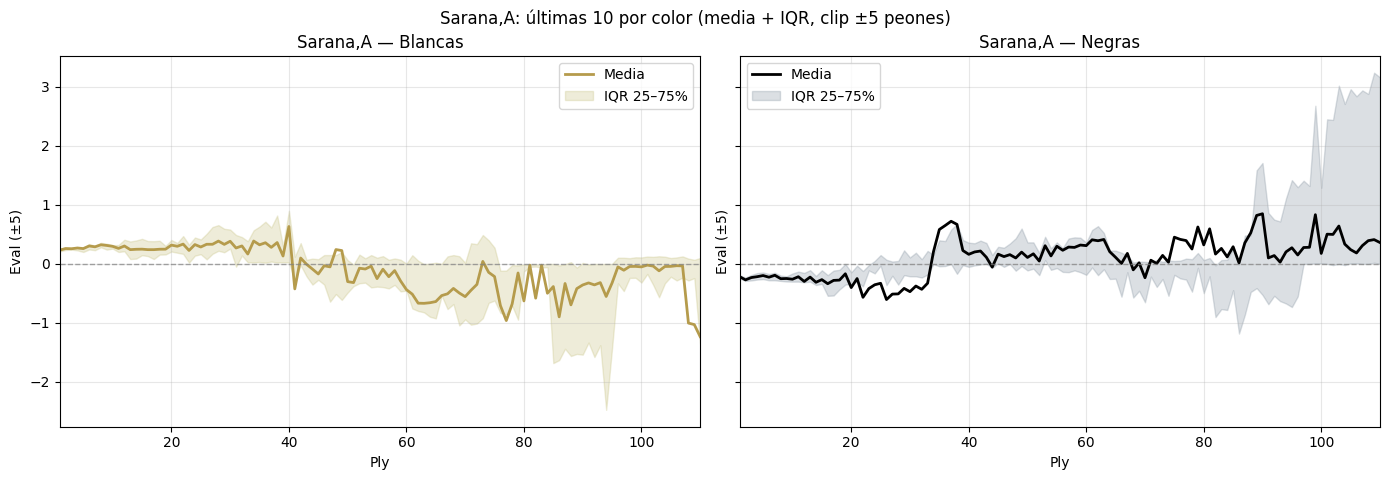

Partidas usadas → Blancas: 10 | Negras: 10


In [20]:
# =========================
# Ejemplo de uso
# =========================
jugador_objetivo = "Sarana,A"
plot_player_dual_mean_iqr(df_raw, jugador_objetivo, n=10, max_ply=110, clip_abs=5.0)

In [21]:
def to_list_evals(x):
    """Convierte evals_all en lista[float] segura."""
    if isinstance(x, str):
        try:
            y = literal_eval(x)
            if isinstance(y, (list, tuple)):
                return [float(v) for v in y]
        except Exception:
            pass
    if isinstance(x, (list, tuple, np.ndarray)):
        return [float(v) for v in x]
    return np.nan


def ajustar_polinomio(evals, grado=4, max_peones=15):
    """
    Ajusta un polinomio de grado 'grado' a la lista de evaluaciones.
    Devuelve (x, y, y_fit, poly).
    """
    if not isinstance(evals, list) or len(evals) < grado + 2:
        return None, None, None, None

    y = np.clip(np.array(evals, dtype=float), -max_peones, max_peones)
    x = np.arange(1, len(y) + 1)

    # Ajuste por mínimos cuadrados
    coef = np.polyfit(x, y, grado)
    poly = np.poly1d(coef)
    y_fit = poly(x)
    return x, y, y_fit, poly


def plot_ajuste_polinomico(df_raw, jugador, n=1, grado=4):
    """
    Dibuja el ajuste polinómico para las 'n' últimas partidas del jugador.
    """
    dfp = df_raw[df_raw["jugador"] == jugador].copy()
    dfp["fechas"] = pd.to_datetime(dfp["fechas"], errors="coerce")
    dfp = dfp.sort_values("fechas", ascending=False).head(n)

    if dfp.empty:
        print(f"No hay partidas para {jugador}.")
        return

    plt.figure(figsize=(10, 5 * n))
    for i, (_, row) in enumerate(dfp.iterrows(), 1):
        evals = to_list_evals(row["evals_all"])
        if not isinstance(evals, list) or len(evals) < grado + 2:
            continue

        x, y, y_fit, poly = ajustar_polinomio(evals, grado=grado)
        if x is None:
            continue

        plt.subplot(n, 1, i)
        plt.plot(x, y, label="Evaluaciones reales", alpha=0.6)
        plt.plot(x, y_fit, label=f"Ajuste polinómico (grado {grado})", linewidth=2)
        plt.axhline(0, color="black", linestyle="--", linewidth=1)
        plt.xlabel("Ply (medio movimiento)")
        plt.ylabel("Evaluación (peones)")
        plt.title(f"{jugador} — Partida {i}")
        plt.grid(alpha=0.3)
        plt.legend()

    plt.tight_layout()
    plt.show()


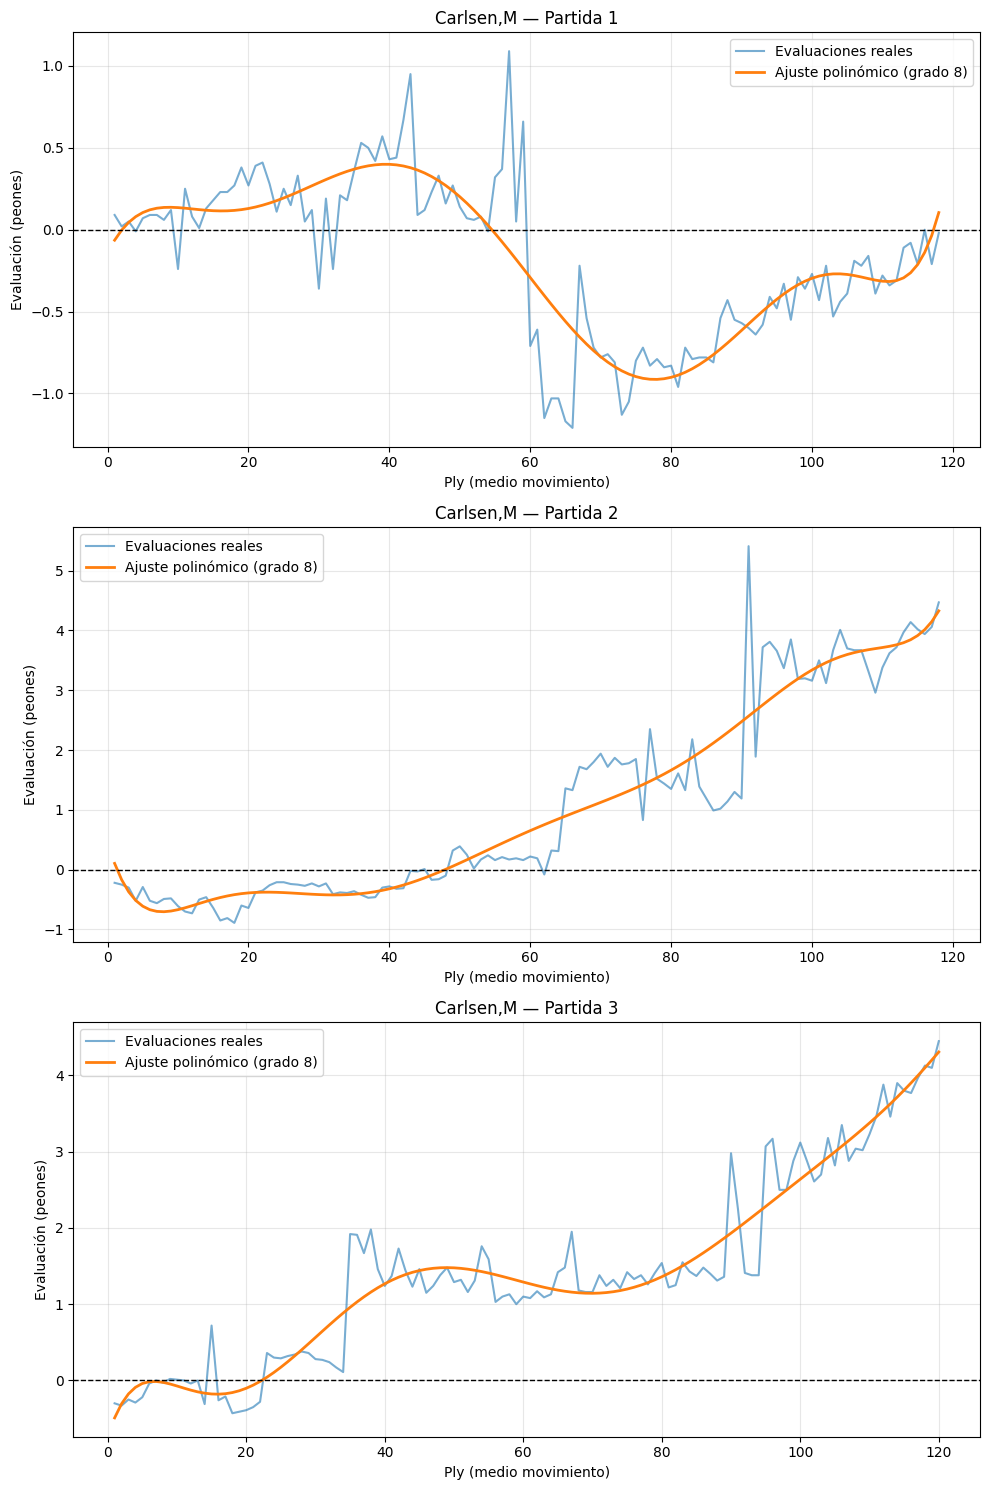

In [22]:
jugador = "Carlsen,M"
plot_ajuste_polinomico(df_raw, jugador, n=3, grado=8)
